##### Curso: Programación en TIG con Python.

## TP FINAL
- Fecha 29/11/2022
- Alumno: Corti Marcelo 

### OBTENCION DE INFORMACION SOBRE INDICE NDWI

**Problema: Extraer informacion de clases de acuerdo a umbrales sobre una imágen satelital óptica Landsat 8 con Índice de agua de Diferencia Normalizado (NDWI) empleando algoritmos en lenguaje Python.**


##### Tiene como objetivo la identificación aproximada de la variacion de los cauces de rios y lagunas bajo condiciones extremas. Para darle mayor contraste, se trabajo con escenas de la  zona de la ciudad de Santa Fe y alrededores, obtenidas en el año 2013 y 2016, creciente ordinaria e inundacion extraordinaria respectivamente

##### Datos:
###### - Imágenes satelitales ópticas Landsat 8 - OLI con las siguientes características:
###### - Fechas: 21 de junio del 2013 y 29 de junio del 2016 path-row=227082 


#### Materiales y métodos
##### La fórmula del NDWI es la siguiente:
###### NDWI = (Green – NIR)/(Green + NIR)
##### Para los datos de Landsat 8:
###### NDWI = (Band 3 – Band 5)/(Band 3 + Band 5)

##### Versiones utilizadas

In [25]:
!python --version
print ("La versión utilizada de numpy es:" , np.__version__)
print ("La versión utilizada de rasterio es:" , rio.__version__)

Python 3.9.13
La versión utilizada de numpy es: 1.21.5
La versión utilizada de rasterio es: 1.3.3


##### Las bibliotecas de Python utilizadas fueron las siguientes:

In [22]:
# Para trabajar con estructura de datos que garantiza calculos con matrices y asi trabajar con arreglos de pixeles:
import numpy as np
# Para visualizar, manipular y crear datos raster, la libreria rasterio permite la lectura, inspección de datos raster:
import rasterio as rio 
from rasterio.plot import show
from rasterio import plot
import os
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

##### A continuación, se enumeran los pasos seguidos:

##### 1) Para leer los datos raster, se importa:

In [2]:
import misfuncionesraster as mfr


In [3]:
ruta_img="C:/Users/PC/Desktop/Landsat 8 -Octubre 2019/"

In [4]:
lect=mfr.Lectura(ruta_img)
lect


['LC08_L1TP_227081_20191012_20191018_01_T1_B1.TIF',
 'LC08_L1TP_227081_20191012_20191018_01_T1_B2.TIF',
 'LC08_L1TP_227081_20191012_20191018_01_T1_B3.TIF',
 'LC08_L1TP_227081_20191012_20191018_01_T1_B4.TIF',
 'LC08_L1TP_227081_20191012_20191018_01_T1_B5.TIF',
 'LC08_L1TP_227081_20191012_20191018_01_T1_B6.TIF',
 'LC08_L1TP_227081_20191012_20191018_01_T1_B7.TIF',
 'LC08_L1TP_227081_20191012_20191018_01_T1_B8.TIF',
 'LC08_L1TP_227081_20191012_20191018_01_T1_B9.TIF',
 'LC08_L1TP_227081_20191012_20191018_01_T1_ANG.txt',
 'LC08_L1TP_227081_20191012_20191018_01_T1_B10.TIF',
 'LC08_L1TP_227081_20191012_20191018_01_T1_B11.TIF',
 'LC08_L1TP_227081_20191012_20191018_01_T1_BQA.TIF',
 'LC08_L1TP_227081_20191012_20191018_01_T1_MTL.txt']

##### 2) Para poder calcular el indice de agua normalizada (NDWI), se convierten los valores de las imágenes de enteros a decimales para las bandas del verde y rojo. Para ello, se invoca la siguiente función:

In [27]:
# !!!Esta funcion demora un tiempo importante en ejecutarse!!!
# Se solicita ser paciente.
#ima=mfr.bandas(lect)
#ima[5000,5000]


-0.3219088420802094

##### 3) Se propone graficar el íncide (plot raster)


Text(0.5, 1.0, 'ndwi')

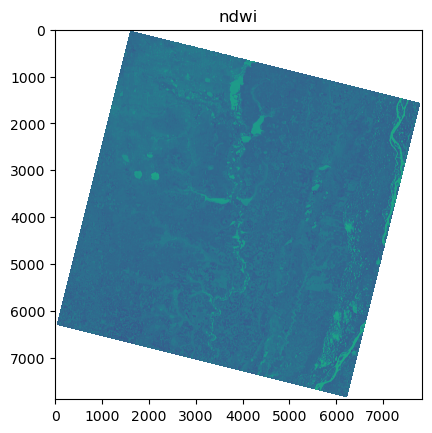

In [30]:
plt.imshow(ima)
plt.title("NDWI")


##### 5) Se representan ambas cartografias en simultaneo para observar los cambios multitemporales.

##### Para este ejemplo tener en cuenta que el ingreso correponde al ndwi de una imágen del año 2013 y la otra del 2016 para poder realizar el análisis multitemporal"""
##### ndwi_13-> ndwi de la escena del año 2013
##### ndwi_16-> ndwi de la escena del año 2016

In [ ]:
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(12,6))
plot.show(ndwi_13, ax=ax1, cmap="YlGnBu")
plot.show(ndwi_16, ax=ax2, cmap="YlGnBu")
fig.tight_layout()

# Para este caso, se adjunta la imagen obtenida como producto en el repositorio para que se puedan observar las diferencias.

##### 4) Se clasifican los valores de numeros digitales para cada intervalo cada intervalo establecido
##### Los valores del NDWI corresponden a los siguientes rangos:

##### 0.2 a 1 –> Inundación
##### 0.0 a 0.2 –> humedad
##### -1.0 a 0.2 -> superficies sin agua
###### Fuente: https://eos.com/es/make-an-analysis/ndwi/

###### Para el calculo del área que ocupa cada clase, se utilizaron imágenes LandSat8 que poseen resolución espacial de 30 metros.

In [6]:
img_ndwi=ima
sup_ndwi=mfr.contar_nd(ima)

La superficie correspondiente al área inundada son :  92.07 Ha
La superficie correspondiente el área humeda son :  138572.91 Ha
La superficie correspondiente al área seca son :  5422832.91 Ha


In [ ]:
# Para la imagen de prueba, los resultados fueron los siguientes:
#La superficie correspondiente al área inundada son :  92.07 Ha
#La superficie correspondiente el área humeda son :  138572.91 Ha
#La superficie correspondiente al área seca son :  5422832.91 Ha    
    

# Para la imagen del año 2013, los resultados fueron los siguientes:    
#La superficie correspondiente al área inundada son :  1.8 Ha
#La superficie correspondiente el área humeda son :  163041.66 Ha
#La superficie correspondiente al área seca son :  5028479.73 Ha   

# Para la imagen del año 2016, los resultados fueron los siguientes: 
# La superficie correspondiente al área inundada son :  2.79 Ha
# La superficie correspondiente el área humeda son :  539355.69 Ha
# La superficie correspondiente al área seca son :  5022139.41 Ha

##### 5) Se exporta la imagen NDWI (se realiza para cada escena en caso que se desee)

In [ ]:
# Ejemplo de como se exporta la imagen NDWI
ndwiImage = rio.open('C:/Users/PC/Desktop/NDWI/ndviImage.tiff', 'w', driver='Gtiff',
width=b3.width, height=b3.height,
count=1,
crs=b3.crs,
transform=b3.transform,
dtype='float64'
)
ndwiImage.write(ndwi,1)
ndwiImage.close()

##### 6) Resultados y discusión

In [ ]:
# Se cumplio con el objetivo de detectar cambios multitemporales sobre los cuerpos de agua utilizando imágenes LandSat 8.
# En la imagen adjunta (ver distribucion espacial del NDWI de las escenas utilizadas para los meses de JUN-2013 y JUN-2016)
# Se consigio observar la variacion de la superficie de los cauces de lagunas y ríos.

# Tal información se constató numericamente
# De los resultados arrojados con la funcion contar, se aprecia que en el año 2016 existen aproximadamente un 65% de hectáreas inundadas 
# y un 35% de hectareas humedas mas que en el año 2013.

# De la aplicacion de este metedo de clasificacion a varias imágenes, 
# se llego a la conclusion de que el uso de funciones en el desarrollo de programas tiene la ventaja de subidivir y reutilizar el codigo, evitando en este caso,
# reescribir el codigo para cada procesamiento de imágenes.

# Por último, tiene falencias ya que se creo solamente para el caso del índice ndwi. Teniendo en cuenta que distintos indices se calculan del mismo modo pero utilizando distintas bandas,
# se podría proponer la creacion de un algorimo en cual se ingrese la posición que ocupa cada banda a utilizar, y la función retorne los valores decimales del índice requerido previamente.


